### Traversal of the space of train/test splits #3  / eeg.csv dataset
### Please note:
    K-Nearest Neighbours model (with its default state and with the best hyper parameter {'n_neighbors': 1} ) will be applied for this issue #3. Decision had been made, since this model became a leader in issue #2.

#### * Import, Read data from ‘eeg.csv’ file
#### * Info, Head, Missing Data 
#### * Observation of target variable 'Class' (visualisation: countplot)
#### * Create datasets for ML 
#### * Scaler
#### * Applying 'test_size' attribute splitting from 10-90 % for Train and Test ('random_state' = 0)
#### * Finding the best number of  'random_state' attribute from 10-90 for Train and Test ('test_size'=0.3)
#### * 'Train\Test' splitting method with new attributes
#### * Scaler
#### * Conclusion


###  Import 

In [458]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn.metrics as metrics
from sklearn.metrics import (accuracy_score, 
                             f1_score,
                             precision_score, 
                             average_precision_score, 
                             recall_score
                            )
from sklearn.model_selection import (train_test_split, 
                                     GridSearchCV
                                    )

from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

%run train_test_split.py
%run scalers.py

### Read data from ‘eeg.csv’ file + Info

In [459]:
# read data from 'egg.csv' file
dataset = pd.read_csv('eeg.csv') 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14976 entries, 0 to 14975
Data columns (total 15 columns):
V1       14976 non-null float64
V2       14976 non-null float64
V3       14976 non-null float64
V4       14976 non-null float64
V5       14976 non-null float64
V6       14976 non-null float64
V7       14976 non-null float64
V8       14976 non-null float64
V9       14976 non-null float64
V10      14976 non-null float64
V11      14976 non-null float64
V12      14976 non-null float64
V13      14976 non-null float64
V14      14976 non-null float64
Class    14976 non-null int64
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


Dataset consists of 14976  rows and 15 columns; 

has 2 datatypes: float64(14), int64(1);

### Head

In [460]:
# preview of the first 5 lines of the loaded data 
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,1
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,1
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,1
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,1
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,1


### Missing Data

In [461]:
# check for missing values
dataset.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
Class    0
dtype: int64


Dataset has no missing values.

### Observation of target variable 'Class' (visualisation: countplot)


__Note:__ In 'Class' column, __'1'__ indicates the __eye-open__, __'2'__ the __eye-closed state__ (based on OpenML dataset description at https://www.openml.org/d/1471).

In [462]:
# check for number of '1' and '2' in 'Class' column
dataset['Class'].value_counts()

1    8254
2    6722
Name: Class, dtype: int64

From the __output__, we can observe that there are __8254 eye-open state__ and __6722 eye-closed state__ cases in the dataset.

In [463]:
# present '1' and '2' states in %
print('1(eye-open state):', round(dataset['Class'].value_counts()[1] / len(dataset) * 100, 2), '% of the dataset')
print('2(eye-closed state):', round(dataset['Class'].value_counts()[2] / len(dataset) * 100, 2), '% of the dataset')


1(eye-open state): 55.11 % of the dataset
2(eye-closed state): 44.89 % of the dataset


Text(0.5, 1.0, 'Class Distributions (1 || 2)')

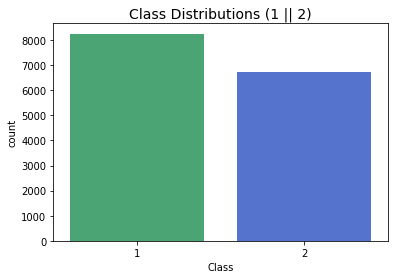

In [464]:
# visualisation of '1' and '2' states.
colors = ["mediumseagreen", "royalblue"]
sns.countplot('Class', data = dataset, palette = colors)
plt.title('Class Distributions (1 || 2)', fontsize = 14)

### Create datasets for ML 

In [465]:
# set 'X' for features and 'y' for the target ('Class').
X = dataset.drop('Class', axis=1)
y = dataset['Class']
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46


### Scaler

__Note:__ Usually, at this stage I am applying __scaler__ for data. This important process needs to be done before building and training ML models since many ML algorithms don't perform  well if the features are not on relatively similar scales. 
However, I always asked myself 'At this stage, how am I supposed to know which scaler fits data in its best way?'. Therefore, I will apply scaler later.

For experiment reason, __K-Nearest Neighbours model (in its default state and with hyper parameter {'n_neighbors': 1})__ will be applied. The following steps will be done:

    Step 1. The best 'test_size' attribute split percentage in 'Train\Test splitting method' will be found. 
    Step 2. The best 'random_state' attribute number in 'Train\Test splitting method' will be found. 
    Step 3. The best Scaler for KNN accuracy (with the best hyper parameters) will be found and applyed.
  

### Applying 'test_size' attribute splitting from 10-90 % for Train and Test ('random_state' = 0)

This method will show two kinds of measurment: Accuracy and F1 score. F1 score was choosen instead of Precision and Recall metrics since it is the harmonic mean of them and gives a better measure of the incorrectly classified cases than the accuracy metric.

In [466]:
split_train_test (X, y, split_size, columns1, table, index)

,X_train,X_test,Accuracy,Accuracy with hyper parameters,F1_score,F1_score with hyper parameters
1,90.0,10.0,0.973965,0.983311,0.975941,0.984596
2,80.0,20.0,0.970961,0.979973,0.973190,0.981504
3,70.0,30.0,0.963721,0.972847,0.966687,0.974887
4,60.0,40.0,0.956268,0.968119,0.960134,0.970800
5,50.0,50.0,0.947917,0.959268,0.952658,0.962882
6,40.0,60.0,0.940574,0.953706,0.946169,0.957963
7,30.0,70.0,0.928272,0.940481,0.935395,0.946262
8,20.0,80.0,0.910859,0.926550,0.920108,0.933795
9,10.0,90.0,0.867869,0.890125,0.881998,0.900437


The results above show, that the best splitting percentage is '90/10'. However, I always remember one rule:
'The more training data you have, the better your model will be. The more testing data you have, the less variance you can expect in your results (ie. accuracy, false positive rate, etc.)'.

Therefore, __'70/30'__ splitting percentage with:

       KNN Accuracy:                       0.963721
       KNN Accuracy with hyper parameters: 0.972847
       KNN F1_score:                       0.966687
       KNN F1_score with hyper parameters: 0.974887

will be choosen for future testing.

Next step will be applying 'random_state' attribute number from 10-90 for Train and Test with 'test_size'= 0.3.

### Finding the best number of  'random_state' attribute from 10-90 for Train and Test ('test_size'=0.3)

In [467]:
random_state (X, y, random1, columns2, table1, index)

,,Random State,Accuracy,Accuracy with hyper parameters,F1_score,F1_score with hyper parameters
1,0.0,10.0,0.957489,0.971066,0.960949,0.973306
2,0.0,20.0,0.967282,0.973069,0.970297,0.975441
3,0.0,30.0,0.961273,0.973514,0.964620,0.975788
4,0.0,42.0,0.965502,0.973737,0.968231,0.975780
5,0.0,50.0,0.960160,0.970621,0.964250,0.973547
6,0.0,60.0,0.968395,0.979524,0.971417,0.981429
7,0.0,70.0,0.964612,0.976853,0.968244,0.979183
8,0.0,80.0,0.960160,0.971956,0.963297,0.974159
9,0.0,90.0,0.963276,0.973959,0.966497,0.976108


The results above depict, that the best __'random_state' number = 60__ with:

       KNN Accuracy:                       0.968395
       KNN Accuracy with hyper parameters: 0.979524
       KNN F1_score:                       0.971417
       KNN F1_score with hyper parameters: 0.981429

At this stage, our Train\Test splitting parameters already found:
   __X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)__


### 'Train\Test' splitting method with new attributes

In [468]:
# apply 'Train\Test' splitting method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)

### Scalers

Tables above show, that the best __Accuracy__ and __F1 score__ always belong to __KNN with hyper parameter {'n_neighbors': 1}__. Therefore, in order to find the best scaler to improve measurements, Scalers will be applied to it.

In [469]:
scalers (X_train, y_train, X_test, y_test)

,Model,Scaler,Accuracy
0,K-Nearest Neighbour:,"StandardScaler(copy=True, with_mean=True, with...",0.968395
1,K-Nearest Neighbour:,"MinMaxScaler(copy=True, feature_range=(0, 1))",0.969953
2,K-Nearest Neighbour:,MaxAbsScaler(copy=True),0.980191
3,K-Nearest Neighbour:,"RobustScaler(copy=True, quantile_range=(25.0, ...",0.971956
4,K-Nearest Neighbour:,"QuantileTransformer(copy=True, ignore_implicit...",0.971289
5,K-Nearest Neighbour:,"QuantileTransformer(copy=True, ignore_implicit...",0.963944
6,K-Nearest Neighbour:,"PowerTransformer(copy=True, method='yeo-johnso...",0.445805
7,K-Nearest Neighbour:,"Normalizer(copy=True, norm='l2')",0.980414


The results above depict, that the best scaler is __Normalizer__ with __Accuracy = 0.980414__.

### Conclusion

 __No scaling, after 'test_size' 70/30:__
 
 KNN Accuracy:                                         0.963721
 
 KNN Accuracy with hyper parameter {'n_neighbors': 1}: __0.972847__
 
  __No scaling, after 'random_state' 60:__
 
 KNN Accuracy:                                         0.968395
 
 KNN Accuracy with hyper parameter {'n_neighbors': 1}: __0.979524__
 
 __Scaler 'Normalizer' applied:__
 
 KNN Accuracy with hyper parameter {'n_neighbors': 1}: __0.980414__
  
Dataset was tuned and improved for future calculations __from 0.963721 to 0.980414.__

Anastasia Rizzo